# Feature Extraction and Image Processing
Mark S. Nixon & Alberto S. Aguado http://www.southampton.ac.uk/~msn/book/
### Chapter 4: *GenerateClassificationDataSet*
Generate an image set for image classification
***  

### Setup modules

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname("__file__"), "../../Modules"))

# Module functions
from ImageUtilities import plotImageF

# Generate sysntetic data functions
from SyntheticImagesUtilities import createLineImages,  createCurveImages, createCircleImages

# In tensor flow images are numpy arrays
import numpy as np

# For save data
import pickle

# Iteration and Maths
from random import randint

### Parameters:
    pathToDir = Directory to store data
    imageSize = Image size
    noiseKernelSize = Size of noise filter
    
    lineLengthMin, lineLengthMax = Size of line shape
    curveLengthMin, curveLengthMax = Size of curve shape
    radiousMin, radiousMax = Size of circle shape

    numTrainImages = Number of train images per shape in the training set
    numTestImages = Number of test images per shape in the test set

    dataSetFileName = Name of the data file

In [2]:
pathToDir = os.path.join(os.path.dirname("__file__"), "../../Images/Chapter4/Input/")

imageSize = 32 
noiseKernelSize = 3

lineLengthMin = 19 
lineLengthMax = 24 

curveLengthMin = 18 
curveLengthMax = 24 

radiousMin = 7 
radiousMax = 10 

numTrainImages = 400
numTestImages = 40
dataSetFileName = "ShapesClassificationData.pickle"

### Function to randomize data

In [3]:
def SuffleImages(trainImagesSet):
    images = []
    labels = []
    
    while len(trainImagesSet) != 0:
        selectClass = randint(0, len(trainImagesSet)-1)
    
        image = trainImagesSet[selectClass][0].pop(0)
    
        images.append(image)
        labels.append(trainImagesSet[selectClass][1])
        
        if len(trainImagesSet[selectClass][0]) == 0:
            trainImagesSet.pop(selectClass)
            
    return images, labels

### Create and save dataset

In [4]:
trainLineImages, testLineImages = createLineImages(numTrainImages, numTestImages, lineLengthMin, lineLengthMax, imageSize, noiseKernelSize)
trainCurveImages, testCurveImages = createCurveImages(numTrainImages, numTestImages, curveLengthMin, curveLengthMax, imageSize, noiseKernelSize)
trainCircleImages, testCircleImages = createCircleImages(numTrainImages, numTestImages, radiousMin, radiousMax, imageSize, noiseKernelSize)

# Suffle
trainImages = []
trainLabels = []
testImages = []
testLabels = []

trainImages, trainLabels=  SuffleImages([(trainLineImages,0), (trainCurveImages,1), (trainCircleImages,2)])
testImages, testLabels=  SuffleImages([(testLineImages,0), (testCurveImages,1), (testCircleImages,2)])

# Save
data = (np.array(trainImages), np.array(trainLabels), np.array(testImages), np.array(testLabels))
with open(pathToDir+dataSetFileName, 'wb') as f:
    pickle.dump(data, f)

### Load and show images

(1200, 32, 32) (1200,) (120, 32, 32) (120,)


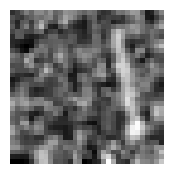

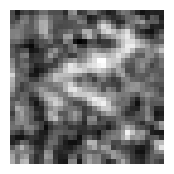

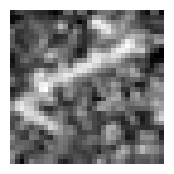

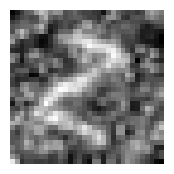

In [5]:
with open(pathToDir+dataSetFileName, 'rb') as f:
     data = pickle.load(f)

trainImages, trainLabels, testImages, testLabels = data 

print(trainImages.shape, trainLabels.shape, testImages.shape, testLabels.shape)

plotImageF(trainImages[1], figureSize = 2)
plotImageF(testImages[1], figureSize = 2)

plotImageF(trainImages[5], figureSize = 2)
plotImageF(testImages[5], figureSize = 2)